# Manipulação dos dados e EDA - DELITOS NYC - 2020

[dataset NY] https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc

## 1- Importando a base de dados

In [1]:
#  Importando as bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date

 - Link do site onde encontra-se o dataset
 
 url:https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc

In [2]:
df=pd.read_csv('dataset.csv')

In [3]:
# visualizando as 5 primeiras linhas do dataset
df[0:5]

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,218375425,09/26/2020,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,M,1,0,25-44,M,WHITE,982285,201682,40.720255,-74.007090,POINT (-74.00709027999993 40.72025522300004)
1,217319714,09/02/2020,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1702500,F,M,5,0,18-24,F,BLACK,983903,200257,40.716344,-74.001253,POINT (-74.00125319299997 40.71634415200003)
2,218282529,09/24/2020,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,F,M,34,0,45-64,M,BLACK,1003633,253391,40.862161,-73.929927,POINT (-73.92992712599995 40.862161439000026)
3,217526617,09/07/2020,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 2650303,F,K,67,0,18-24,M,BLACK,1003029,176696,40.651655,-73.932325,POINT (-73.93232493699998 40.65165467100008)
4,218518385,09/29/2020,268.0,CRIMINAL MIS 2 & 3,121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,F,K,66,0,18-24,M,BLACK,988164,170927,40.635839,-73.985899,POINT (-73.98589935799998 40.635839049000026)


## 2- Preparaçao dos dados


 - Removendo as colunas que nao serão utilizadas 

In [4]:
select_ny=df.drop(['ARREST_KEY', 'PD_CD', 'PD_DESC', 'KY_CD', 'LAW_CODE','ARREST_PRECINCT', 'JURISDICTION_CODE', 'X_COORD_CD', 'Y_COORD_CD','New Georeferenced Column'], axis=1)

In [5]:
#  Renomeando as colunas

select_ny.columns = ['data_da_ocorrencia','descricao_da_ofensa','nivel_da_ofensa','bairro'
                     ,'idade_do_infrator','sexo_do_infrator','raca_do_infrator','latitude','longitude']

In [6]:
# reorganizando os dados referentes a data 

def date_to_weekday(date):
    weekday_dict = {0:'Monday', 1:'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
    date_time_obj = datetime.datetime.strptime(date, '%m/%d/%Y')
    return weekday_dict[date_time_obj.weekday()]

date = select_ny['data_da_ocorrencia'].str.split("/", n = 3, expand = True)
select_ny['ano'] = date[2].astype('int32')
select_ny['dia'] = date[1].astype('int32')
select_ny['mes'] = date[0].astype('int32')
select_ny['dia_da_semana'] = select_ny['data_da_ocorrencia'].apply(date_to_weekday)

# alterando os dados da coluna nivel_da_ofensa

new_nivel_da_ofensa = {'M': "contravencao", 'F': "crime", 'V': "violacao",'I':"outro" }
select_ny['nivel_da_ofensa'] = select_ny['nivel_da_ofensa'].map(new_nivel_da_ofensa)

# alterando os dados da coluna bairro

new_bairro = {'B': 'Bronx', 'S': 'Staten_Island', 'K': 'Brooklyn', 'M': 'Manhattan' , 'Q': 'Queens' }
select_ny['bairro'] = select_ny['bairro'].map(new_bairro)

In [7]:
select_ny.head()

,data_da_ocorrencia,descricao_da_ofensa,nivel_da_ofensa,bairro,idade_do_infrator,sexo_do_infrator,raca_do_infrator,latitude,longitude,ano,dia,mes,dia_da_semana
0,09/26/2020,RAPE,crime,Manhattan,25-44,M,WHITE,40.720255,-74.007090,2020,26,9,Saturday
1,09/02/2020,FORGERY,crime,Manhattan,18-24,F,BLACK,40.716344,-74.001253,2020,2,9,Wednesday
2,09/24/2020,BURGLARY,crime,Manhattan,45-64,M,BLACK,40.862161,-73.929927,2020,24,9,Thursday
3,09/07/2020,DANGEROUS WEAPONS,crime,Brooklyn,18-24,M,BLACK,40.651655,-73.932325,2020,7,9,Monday
4,09/29/2020,CRIMINAL MISCHIEF & RELATED OF,crime,Brooklyn,18-24,M,BLACK,40.635839,-73.985899,2020,29,9,Tuesday


In [8]:
select_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103376 entries, 0 to 103375
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   data_da_ocorrencia   103376 non-null  object 
 1   descricao_da_ofensa  103352 non-null  object 
 2   nivel_da_ofensa      102406 non-null  object 
 3   bairro               103376 non-null  object 
 4   idade_do_infrator    103376 non-null  object 
 5   sexo_do_infrator     103376 non-null  object 
 6   raca_do_infrator     103376 non-null  object 
 7   latitude             103376 non-null  float64
 8   longitude            103376 non-null  float64
 9   ano                  103376 non-null  int32  
 10  dia                  103376 non-null  int32  
 11  mes                  103376 non-null  int32  
 12  dia_da_semana        103376 non-null  object 
dtypes: float64(2), int32(3), object(8)
memory usage: 9.1+ MB


 - Convertendo a coluna " DATA_DA_OCORRENCIA "para formato datetime

In [9]:
select_ny["data_da_ocorrencia"] = pd.to_datetime(select_ny["data_da_ocorrencia"] )

## 3.0  Gerando algumas vizualizações de select_ny 

### 3.1- Quantidade de delitos cometidos por bairros
 
 - Delitos_concluidos_por_bairros será o dataframe a ser utilizado neste tópico
 - Selecionando apenas os delitos concluídos

 - Criando o DataFrame delitos_concluidos_por_bairros

In [10]:
delitos_concluidos_por_bairros_df = select_ny.bairro.value_counts().to_frame().reset_index()
delitos_concluidos_por_bairros_df.columns = ['bairro' , 'qtde_delitos']

In [11]:
delitos_concluidos_por_bairros_df

,bairro,qtde_delitos
0,Brooklyn,27962
1,Manhattan,24637
2,Bronx,23963
3,Queens,22316
4,Staten_Island,4498


- Visualizando a quantidade de delitos em cada bairro

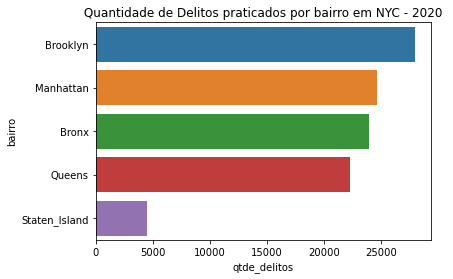

In [12]:
sns.barplot(y = 'bairro' , x = 'qtde_delitos' , data = delitos_concluidos_por_bairros_df)
titulo = ' Quantidade de Delitos praticados por bairro em NYC - 2020 '
plt.title(titulo)
plt.show()

 - Distribuição dos delitos cometidos de acordo com o dia do mes

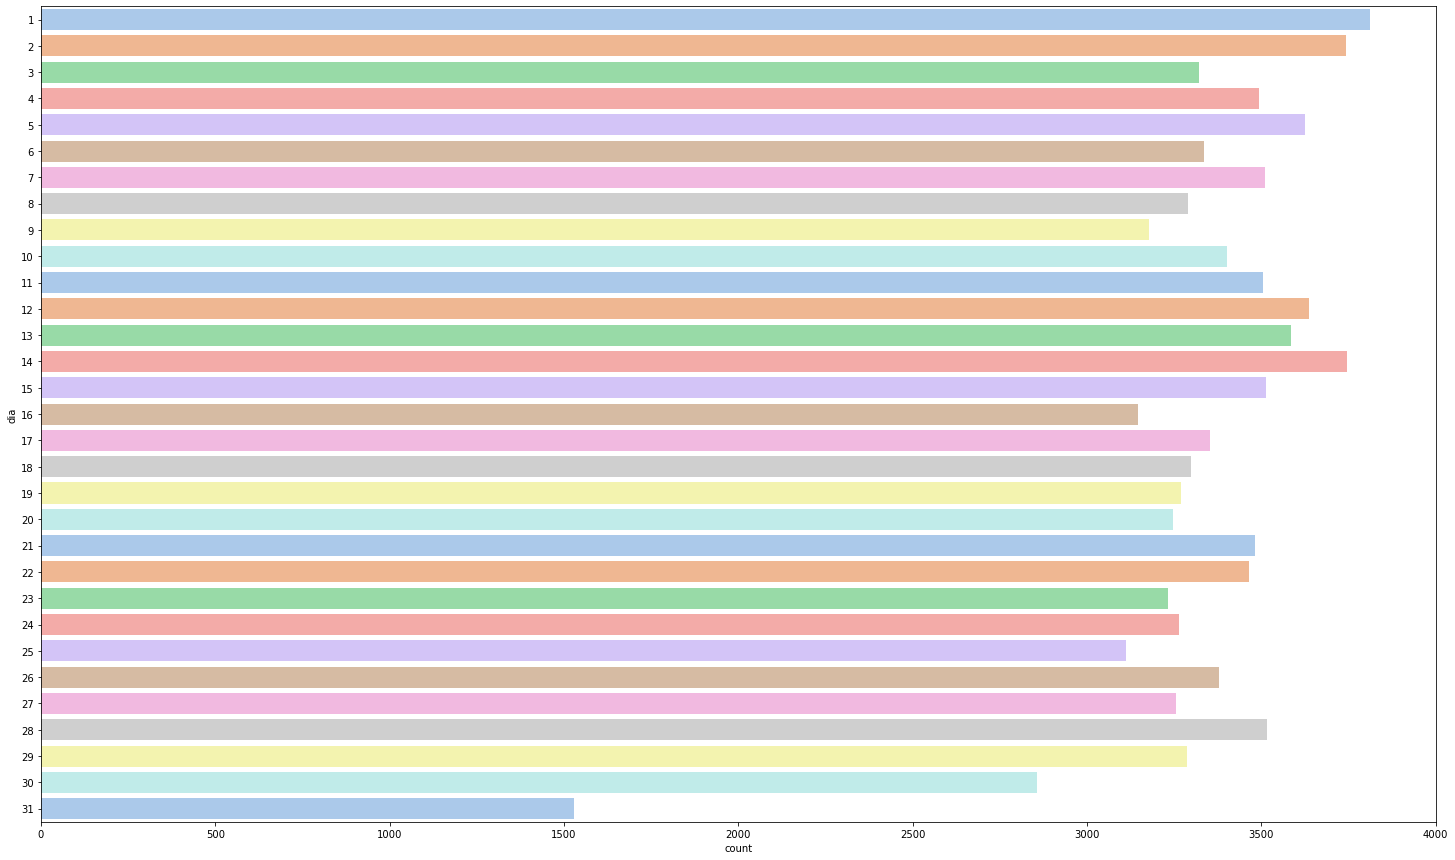

In [13]:
f, ax = plt.subplots(figsize=(25, 15))
sns.countplot(y="dia", data=select_ny,palette="pastel" );

In [14]:
select_ny.shape

(103376, 13)

 - Distribuição dos delitos por mes

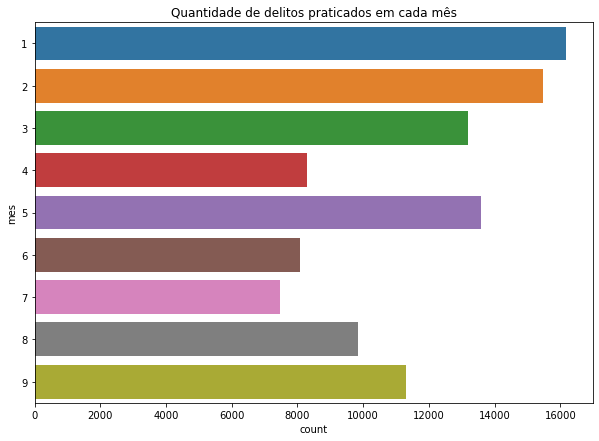

In [15]:
f, ax = plt.subplots(figsize=(10, 7))
sns.countplot(y="mes", data=select_ny)
titulo='Quantidade de delitos praticados em cada mês'
plt.title(titulo)
plt.show()

### 3.2- Descrição da ofensa :  tipos de delitos mais comuns

In [16]:
tipos_de_delitos = select_ny.descricao_da_ofensa.value_counts().to_frame().reset_index()
tipos_de_delitos.columns = ['descricao_da_ofensa' , 'quantidade']

 - Visualizando os tipos de delitos mais recorrentes

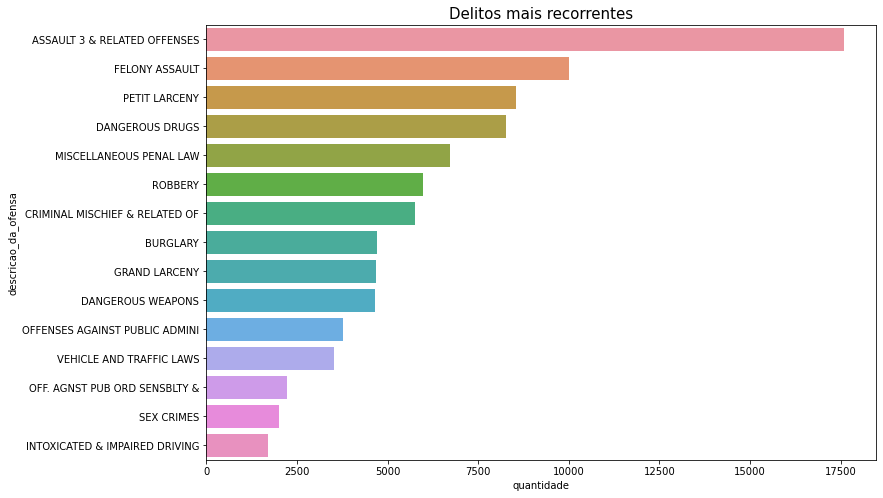

In [17]:
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(y = 'descricao_da_ofensa' , x = 'quantidade' , data = tipos_de_delitos.head(15))
titulo='Delitos mais recorrentes'
plt.title(titulo, fontsize=15)
plt.show()

###  3.3- Visualizando a distribuicao do sexo e raça dos infratores 

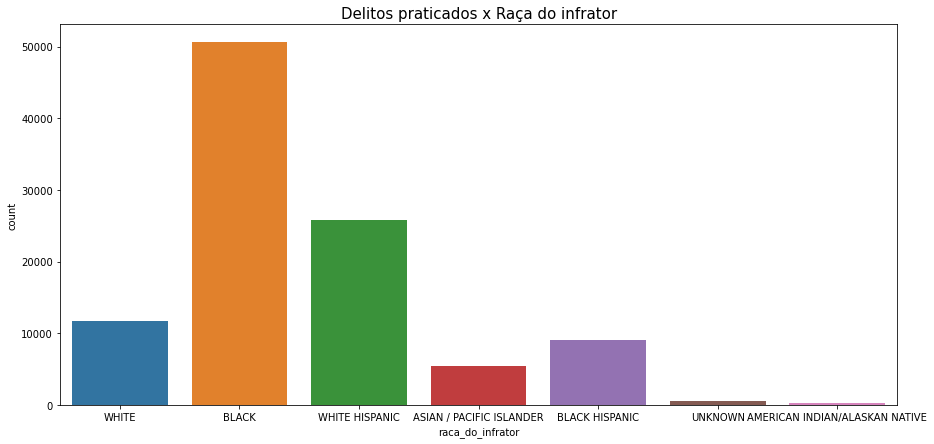

In [18]:
f, ax = plt.subplots(figsize=(15, 7))
sns.countplot( x ="raca_do_infrator", data=select_ny)
titulo ='Delitos praticados x Raça do infrator'
plt.title(titulo, fontsize=15)
plt.show()

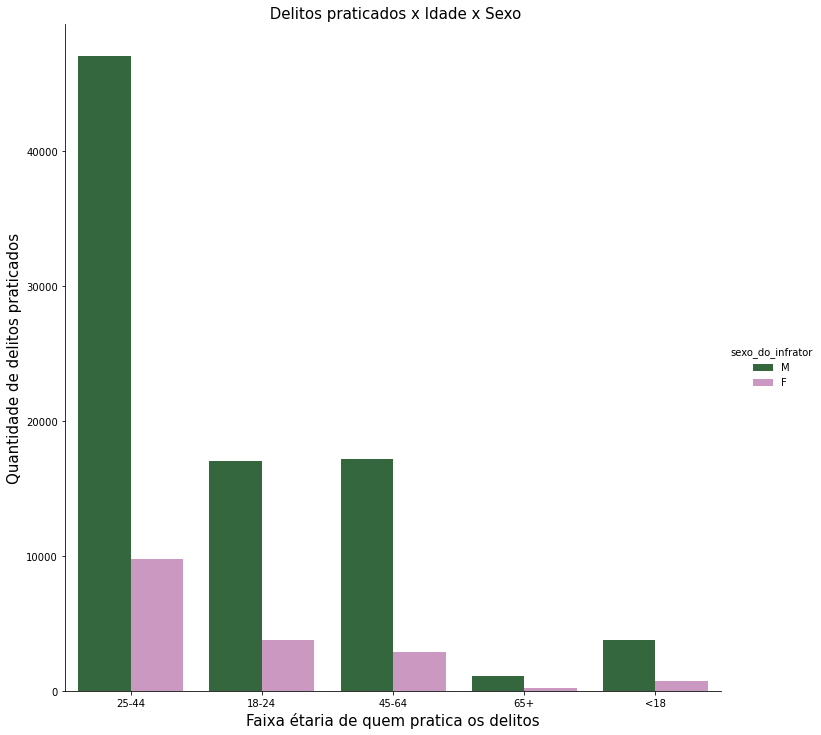

In [19]:
ax = sns.catplot(x="idade_do_infrator", hue="sexo_do_infrator", kind="count",palette="cubehelix", data=select_ny, height=10, aspect=1)
plt.xlabel('Faixa étaria de quem pratica os delitos' , fontsize=15)
plt.ylabel('Quantidade de delitos praticados' , fontsize=15)
titulo =" Delitos praticados x Idade x Sexo"
plt.title(titulo, fontsize=15)
plt.show()

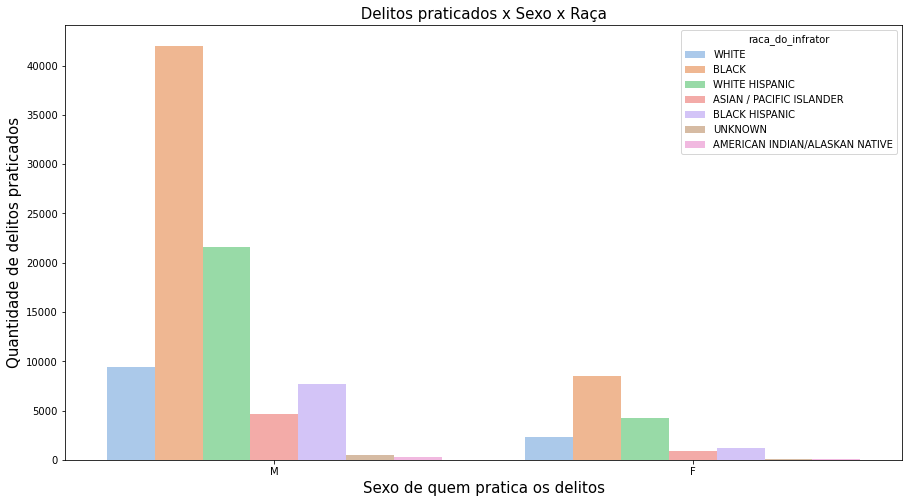

In [20]:
plt.figure(figsize=(15,8))
sns.countplot(x="sexo_do_infrator", hue="raca_do_infrator", data=select_ny, palette="pastel")
plt.xlabel('Sexo de quem pratica os delitos' , fontsize=15)
plt.ylabel('Quantidade de delitos praticados' , fontsize=15)
titulo =" Delitos praticados x Sexo x Raça "
plt.title(titulo, fontsize=15)
plt.show()

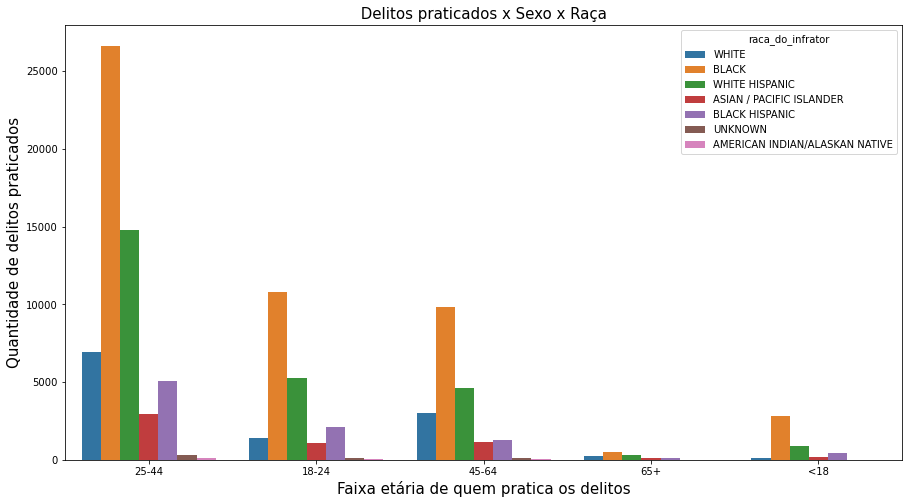

In [21]:
plt.figure(figsize=(15,8))
sns.countplot(x='idade_do_infrator', hue='raca_do_infrator', data = select_ny)
plt.xlabel('Faixa etária de quem pratica os delitos' , fontsize=15)
plt.ylabel('Quantidade de delitos praticados' , fontsize=15)
titulo =" Delitos praticados x Sexo x Raça "
plt.title(titulo, fontsize=15)
plt.show()

 ### Selecinando apenas os crimes com maiores incidencias.
 
  - Baseado no DataFrame criado anteriormente "tipos_de_delitos" , selecinamos os 15 tipos mais recorrentes.

In [22]:
select_ny = select_ny.query('descricao_da_ofensa =="ASSAULT 3 & RELATED OFFENSES" or  descricao_da_ofensa =="FELONY ASSAULT" or descricao_da_ofensa =="PETIT LARCENY" or descricao_da_ofensa =="DANGEROUS DRUGS" or descricao_da_ofensa =="MISCELLANEOUS PENAL LAW" or descricao_da_ofensa =="ROBBERY" or descricao_da_ofensa =="CRIMINAL MISCHIEF & RELATED OF" or descricao_da_ofensa =="BURGLARY" or  descricao_da_ofensa =="GRAND LARCENY" or descricao_da_ofensa =="DANGEROUS WEAPONS" or  descricao_da_ofensa =="OFFENSES AGAINST PUBLIC ADMINI" or descricao_da_ofensa =="VEHICLE AND TRAFFIC LAWS" or  descricao_da_ofensa =="OFF. AGNST PUB ORD SENSBLTY &" or descricao_da_ofensa =="SEX CRIMES" or descricao_da_ofensa =="INTOXICATED & IMPAIRED DRIVING"  ')

In [23]:
select_ny = select_ny.dropna()

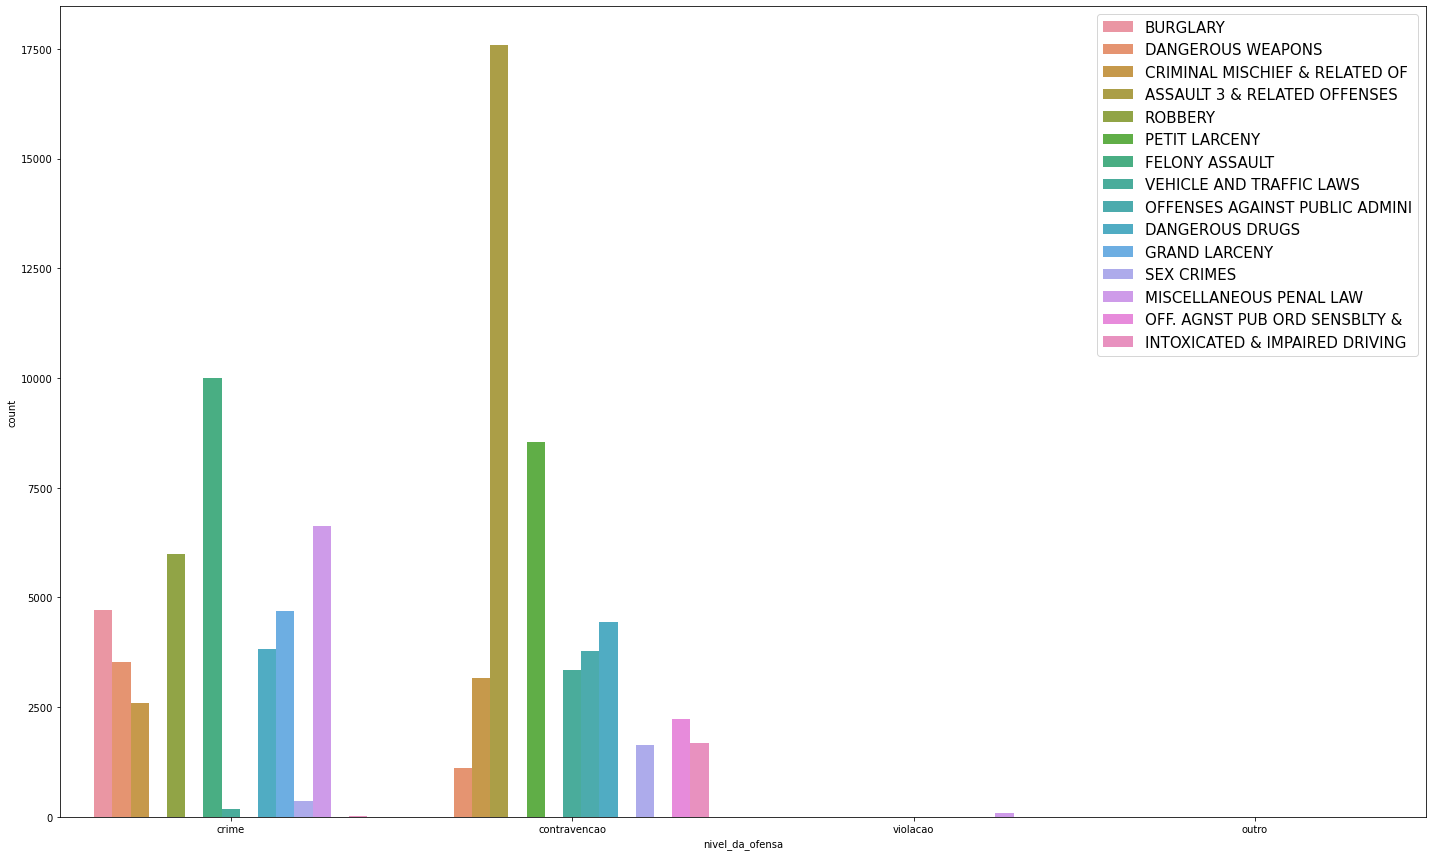

In [24]:
plt.figure(figsize=(20,12))
sns.countplot(x='nivel_da_ofensa' , hue='descricao_da_ofensa' , data = select_ny)
plt.legend(fontsize=15,loc=1)
plt.tight_layout()
plt.show()

# 4 - Modelagem

## 4.1 Preparação dos Dados
- Separação Treino/Teste
- Separar Dados de Entrada (Atributos) e de saída (target)
- Tratar colunas categóricas
- Tratar dados ausentes


## Criando um modelo de classificacao pra definir se quem praticou o delito era do sexo masculino ou femino .

 - Exculuindo colunas que não serão utilizadas

In [25]:
select_ny = select_ny.drop(columns=['ano','data_da_ocorrencia','dia'])

 - Convertendo variáveis categóricas em variáveis numéricas

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
enconder = LabelEncoder()

In [28]:
select_ny.head()

,descricao_da_ofensa,nivel_da_ofensa,bairro,idade_do_infrator,sexo_do_infrator,raca_do_infrator,latitude,longitude,mes,dia_da_semana
2,BURGLARY,crime,Manhattan,45-64,M,BLACK,40.862161,-73.929927,9,Thursday
3,DANGEROUS WEAPONS,crime,Brooklyn,18-24,M,BLACK,40.651655,-73.932325,9,Monday
4,CRIMINAL MISCHIEF & RELATED OF,crime,Brooklyn,18-24,M,BLACK,40.635839,-73.985899,9,Tuesday
5,ASSAULT 3 & RELATED OFFENSES,contravencao,Brooklyn,25-44,M,WHITE HISPANIC,40.646338,-74.010837,9,Monday
6,CRIMINAL MISCHIEF & RELATED OF,crime,Brooklyn,25-44,M,WHITE HISPANIC,40.694602,-73.973125,9,Wednesday


In [29]:
select_ny['descricao_da_ofensa'] = enconder.fit_transform(select_ny['descricao_da_ofensa'])
select_ny['nivel_da_ofensa'] = enconder.fit_transform(select_ny['nivel_da_ofensa'])
select_ny['bairro'] = enconder.fit_transform(select_ny['bairro'])
select_ny['idade_do_infrator'] = enconder.fit_transform(select_ny['idade_do_infrator'])
select_ny['sexo_do_infrator'] = enconder.fit_transform(select_ny['sexo_do_infrator'])
select_ny['raca_do_infrator'] = enconder.fit_transform(select_ny['raca_do_infrator'])
select_ny['dia_da_semana'] = enconder.fit_transform(select_ny['dia_da_semana'])

In [30]:
select_ny.head()

,descricao_da_ofensa,nivel_da_ofensa,bairro,idade_do_infrator,sexo_do_infrator,raca_do_infrator,latitude,longitude,mes,dia_da_semana
2,1,1,2,2,1,2,40.862161,-73.929927,9,4
3,4,1,1,0,1,2,40.651655,-73.932325,9,1
4,2,1,1,0,1,2,40.635839,-73.985899,9,5
5,0,0,1,1,1,6,40.646338,-74.010837,9,1
6,2,1,1,1,1,6,40.694602,-73.973125,9,6


Separando as variaveis em X e Y

In [31]:
X = select_ny.drop('sexo_do_infrator',axis=1).values
Y = select_ny['sexo_do_infrator'].values


Separando em amostras de treino e teste

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_treino,X_teste,Y_treino,Y_teste = train_test_split(X,Y,test_size=0.25,random_state=0)

Aplicando o modelo da arvore de decisão

In [34]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [35]:
dte = DecisionTreeClassifier()

In [36]:
dte.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier()>

Ajustando o modelo

In [37]:
dte.fit(X_treino,Y_treino)

DecisionTreeClassifier()

Determinando acurácia na amostra de treino

In [38]:
score_treino = dte.score(X_treino,Y_treino)

In [39]:
score_treino

0.9868677905944987

Realizando previsão na amostra de teste

In [40]:
Y_previsto = dte.predict(X_teste)

In [41]:
score_teste = dte.score(X_teste,Y_teste)

In [42]:
score_teste

0.7362023070097604

Gerando matriz de confusão para comparar os resultados

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
cm=confusion_matrix(Y_teste,Y_previsto)

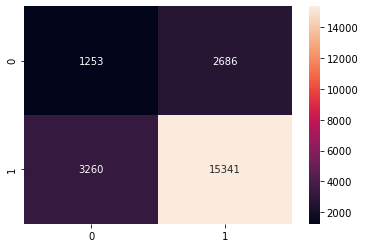

In [45]:
sns.heatmap(cm, annot=True , fmt='g')

Alem do score na amostra de teste não estar adequado, devemos notar que muitos casos negativos foram classificados como positivo. Isto pode ser corrigido, ajustando melhor os parâmetros do modelo com GridSearch por exeplo, ou balanceando a amostra

Criando modelo do GridSearchCV

In [46]:
# critérios para medir a qualidade da divisão dos dados
criterion=['gini','entropy']
max_depth = np.arange(2,10)
max_features= np.arange(2,10)

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
parametros = {'criterion' : criterion, 'max_depth' : max_depth, 'max_features' : max_features}

In [49]:
melhor_modelo = GridSearchCV(dte, parametros, n_jobs=-1, cv=5, refit=True, scoring='accuracy')

In [50]:
melhor_modelo.fit(X_treino, Y_treino)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy')

In [51]:
modelo_final = melhor_modelo.best_estimator_

In [52]:
modelo_final

DecisionTreeClassifier(max_depth=4, max_features=8)

In [53]:
Y_previsto = modelo_final.predict(X_teste)

In [54]:
cm_nova=confusion_matrix(Y_teste,Y_previsto)

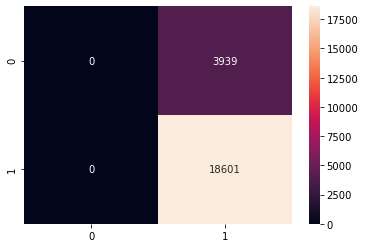

In [55]:
sns.heatmap(cm_nova, annot=True , fmt='g')

In [56]:
score_teste = modelo_final.score(X_teste,Y_teste)

In [57]:
score_teste

0.8252440106477373

In [58]:
from sklearn.metrics import classification_report
print(classification_report(Y_teste, Y_previsto))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3939
           1       0.83      1.00      0.90     18601

    accuracy                           0.83     22540
   macro avg       0.41      0.50      0.45     22540
weighted avg       0.68      0.83      0.75     22540



C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
from sklearn.metrics import roc_curve, roc_auc_score

In [60]:
roc_score = roc_auc_score(Y_teste, Y_previsto)
print("ROC score = {:0.2f}%".format(roc_score*100))

ROC score = 50.00%


In [61]:
roc_fpr, roc_tpr, _ = roc_curve(Y_teste, Y_previsto)

Text(0, 0.5, 'True Positive Rate')

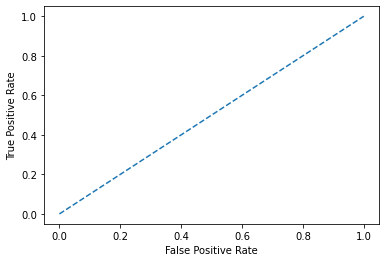

In [62]:
plt.plot(roc_fpr, roc_tpr, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')